In [1]:
library(tidyverse)

library(plyr)
library(lubridate)

data <- read_csv("data.csv", col_names=TRUE)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.1     ✔ dplyr   0.8.4
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: ‘plyr’


The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


The following object is masked from ‘package:purrr’:

    compact



Attaching package: ‘lubridate’




In [2]:
print(data)

# A tibble: 251 x 10
   date  class  club    hw stress fatigue productivity  diet work_total
   <chr> <chr> <dbl> <dbl>  <dbl>   <dbl>        <dbl> <dbl>      <dbl>
 1 1/3/… 0         0     0      4       8            6     2       3.82
 2 NA    NA       NA    NA     NA      NA           NA    NA      NA   
 3 1/4/… 0         0     0      5       7            6     3       0   
 4 NA    NA       NA    NA     NA      NA           NA    NA      NA   
 5 1/5/… 0         0     0      4       6            6     1       0   
 6 NA    NA       NA    NA     NA      NA           NA    NA      NA   
 7 1/6/… 0         2     0      6       7            5     4       3.95
 8 NA    NA       NA    NA     NA      NA           NA    NA      NA   
 9 1/7/… 0         0     0      3       5            7     7       5.8 
10 NA    NA       NA    NA     NA      NA           NA    NA      NA   
# … with 241 more rows, and 1 more variable: total_hours <dbl>


In [3]:
data <- data %>% drop_na(date)

data$class <- as.numeric(data$class)

data[is.na(data)] = 0

In [4]:
data$date <- parse_date(data$date, "%m/%d/%y")
print(head(data))

# A tibble: 6 x 10
  date       class  club    hw stress fatigue productivity  diet work_total
  <date>     <dbl> <dbl> <dbl>  <dbl>   <dbl>        <dbl> <dbl>      <dbl>
1 2020-01-03     0     0     0      4       8            6     2       3.82
2 2020-01-04     0     0     0      5       7            6     3       0   
3 2020-01-05     0     0     0      4       6            6     1       0   
4 2020-01-06     0     2     0      6       7            5     4       3.95
5 2020-01-07     0     0     0      3       5            7     7       5.8 
6 2020-01-08     0     0     3      3       4            5     6       4.63
# … with 1 more variable: total_hours <dbl>


In [5]:

data$ymd = lubridate::isoweek(ymd(data$date))

data$wday = wday(data$date)

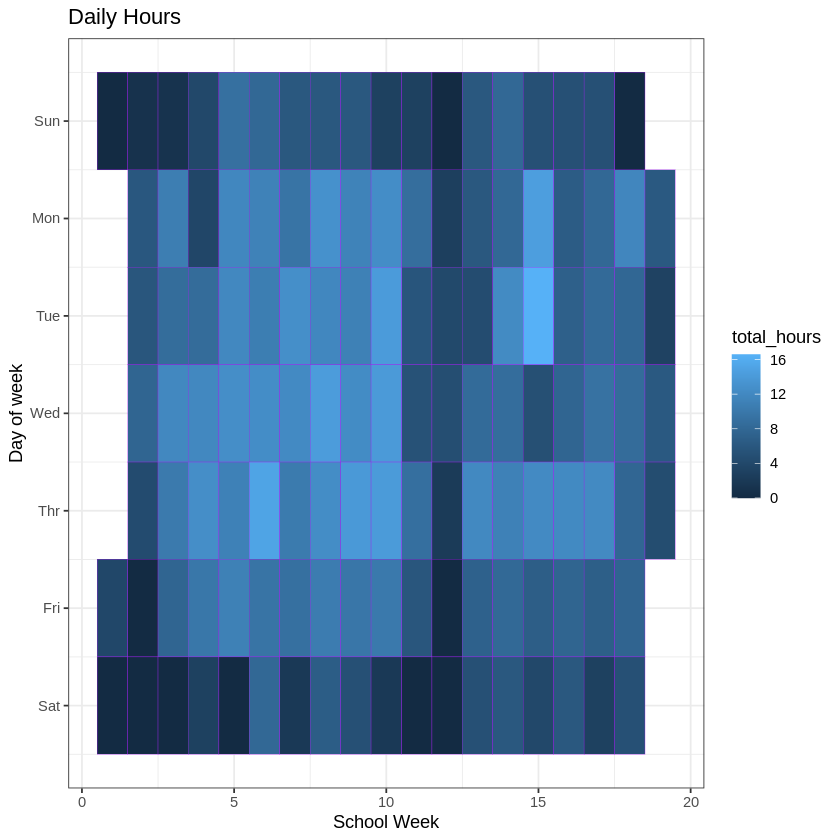

In [6]:
ggplot(data, aes(ymd, wday))+ 
    geom_tile(aes(fill= total_hours), color="purple") +
    ggtitle("Daily Hours") +
    labs(x="School Week", y="Day of Week") +
    scale_y_continuous(name="Day of week",trans = "reverse",
        breaks=c(1,2,3,4,5,6,7),
        labels=c("Sun", "Mon", "Tue", "Wed","Thr","Fri","Sat")) +
    theme_bw()
ggsave(file="weekly.png", width=10, height=4, dpi=300)

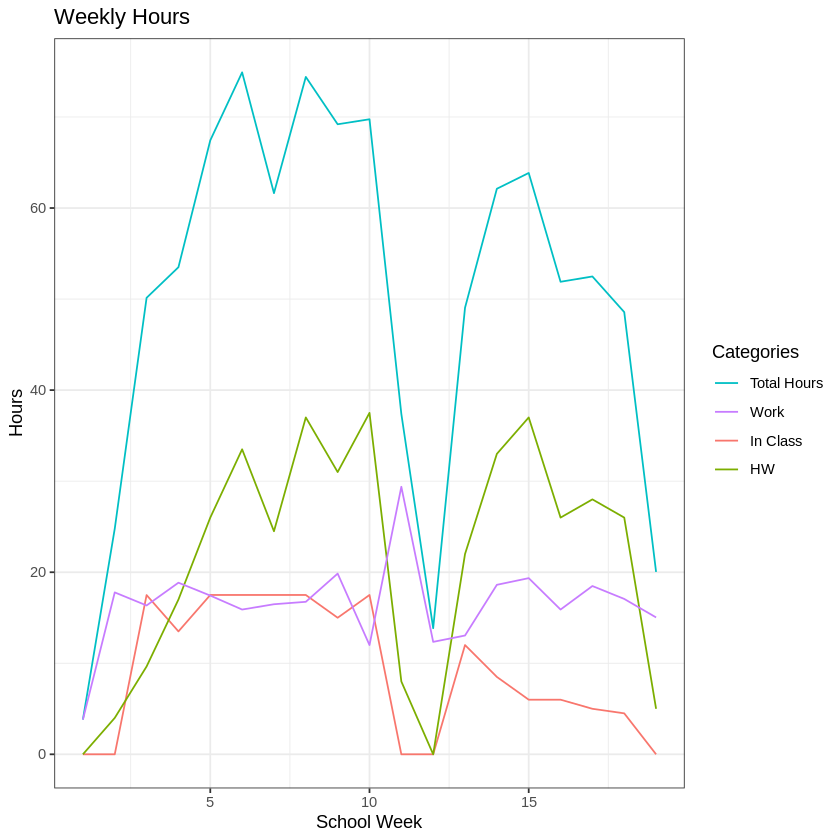

In [7]:
data %>% group_by(ymd) %>%
    dplyr::summarise(total = sum(total_hours),
                     work_t = sum(work_total), 
                     class_t = sum(class),
                     hw_t = sum(hw)) %>%
    gather(key,value, total, work_t, class_t, hw_t) %>%
        ggplot(mapping=aes(x = ymd)) + 
        ggtitle("Weekly Hours") +
        geom_line(mapping=aes(y = value, colour = key)) +
        labs(x="School Week", y="Hours") +
        scale_colour_discrete(name="Categories",
                         breaks=c("total", "work_t", "class_t", "hw_t"),
                         labels=c("Total Hours", "Work", "In Class", "HW")) + 
        theme_bw()
ggsave(file="weeklyLineGraph.png", width=8, height=4, dpi=300)

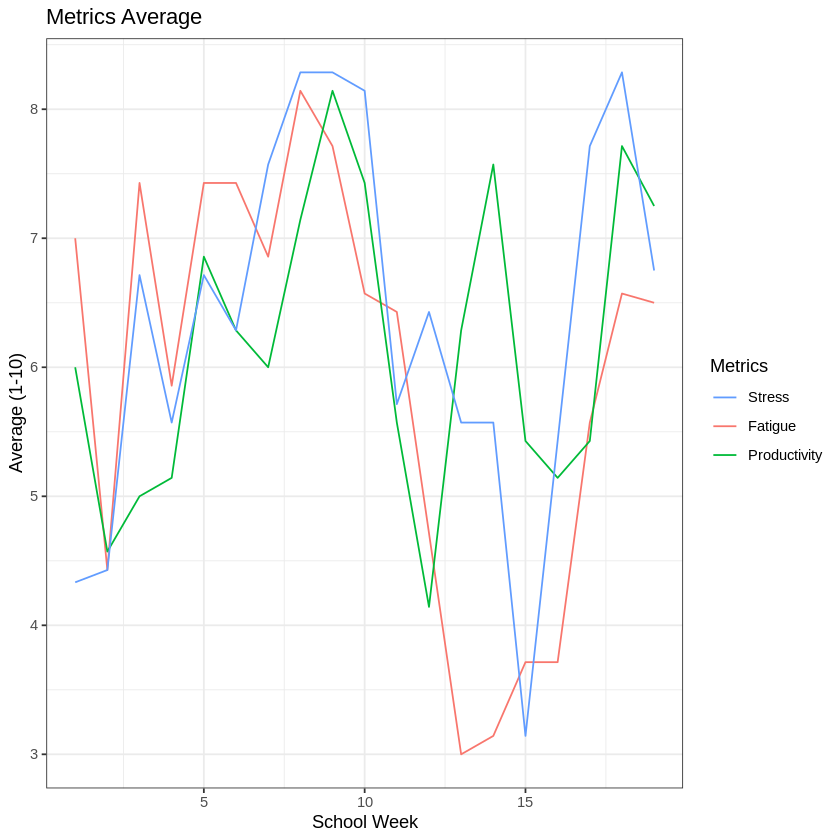

In [8]:
data %>% group_by(ymd) %>%
    dplyr::summarise(stress_a = mean(stress), 
                     fatigue_a = mean(fatigue), 
                     productivity_a = mean(productivity)) %>%
    gather(key,value, stress_a, fatigue_a, productivity_a) %>%
        ggplot(mapping=aes(x = ymd)) + 
        ggtitle("Metrics Average") +
        geom_line(mapping=aes(y = value, colour = key)) +
        labs(x="School Week", y="Average (1-10)") +
        scale_colour_discrete(name="Metrics",
                         breaks=c("stress_a", "fatigue_a", "productivity_a"),
                         labels=c("Stress", "Fatigue", "Productivity")) + 
        theme_bw()
ggsave(file="weeklyLineGraphMetrics.png", width=8, height=4, dpi=300)

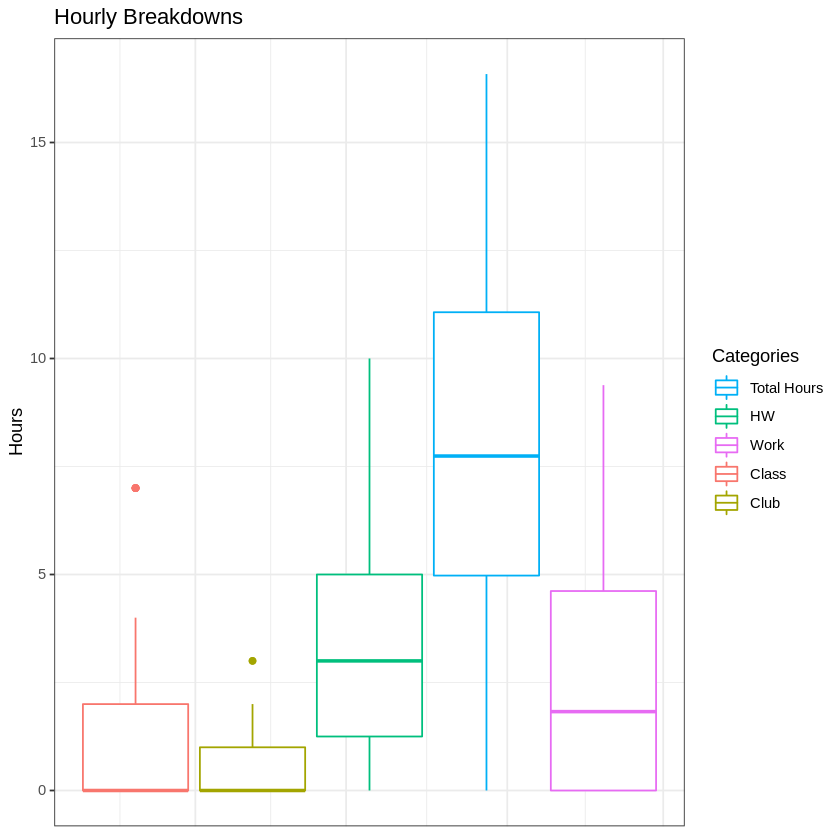

In [9]:
data %>% 
    group_by(date) %>%
    gather(key,value, class, club, hw, work_total, total_hours)  %>%
    ggplot(mapping=aes(x = date)) + 
        ggtitle("Hourly Breakdowns") +
        geom_boxplot(mapping=aes(y = value, colour = key)) +
        labs(y="Hours") +
        scale_colour_discrete(name="Categories",
             breaks=c("total_hours", "hw", "work_total", "class", "club"),
             labels=c("Total Hours", "HW", "Work", "Class", "Club")) + 
        theme_bw() +
        theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())
ggsave(file="hourlyBoxPlots.png", width=6, height=4, dpi=300)

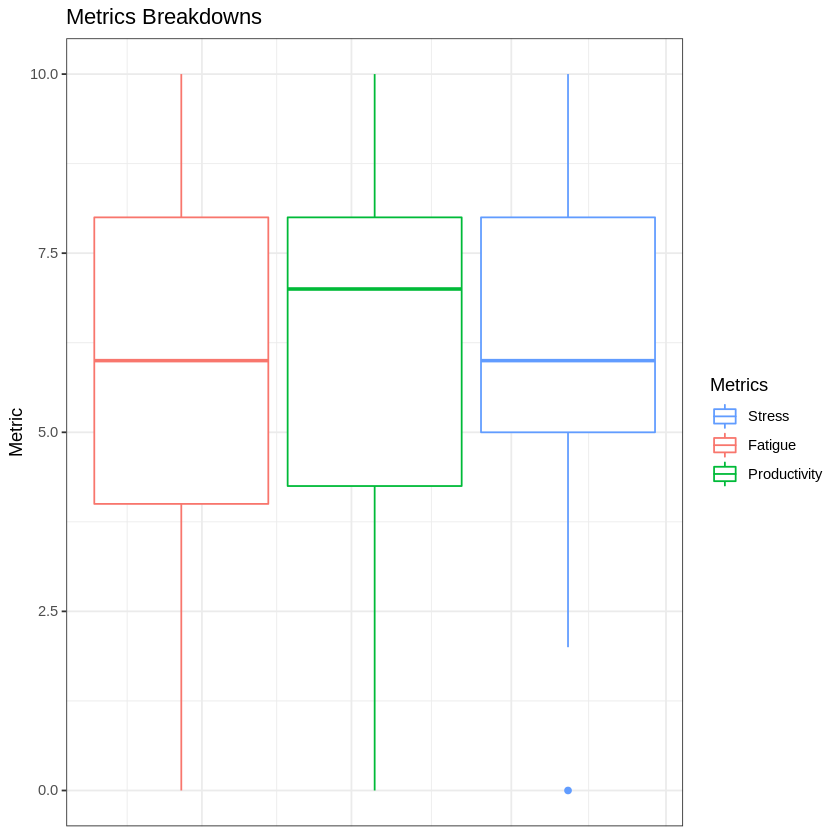

In [10]:
data %>% 
    group_by(date) %>%
    gather(key,value, stress, fatigue, productivity)  %>%
    ggplot(mapping=aes(x = date)) + 
        ggtitle("Metrics Breakdowns") +
        geom_boxplot(mapping=aes(y = value, colour = key)) +
        labs(y="Metric") +
        scale_colour_discrete(name="Metrics",
                         breaks=c("stress", "fatigue", "productivity"),
                         labels=c("Stress", "Fatigue", "Productivity")) + 
        theme_bw() +
        theme(axis.title.x=element_blank(),
            axis.text.x=element_blank(),
            axis.ticks.x=element_blank())
ggsave(file="metricsBoxPlots.png", width=6, height=4, dpi=300)

Loading required package: PerformanceAnalytics

Loading required package: xts

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last



Attaching package: ‘PerformanceAnalytics’


The following object is masked from ‘package:graphics’:

    legend


Loading required package: quantmod

Loading required package: TTR

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Version 0.4-0 included new data defaults. See ?getSymbols.

══ Need to Learn tidyquant? ════════════════════════════════════════════════════
Business Science offers a 1-hour course - Learning Lab #9: Performance Analysis & Portfolio Optimization with tidyquant!
</> Learn more at: https://university.business-science.io/p/learning-labs-pro </>

Loading required package: lattice

Loading requi

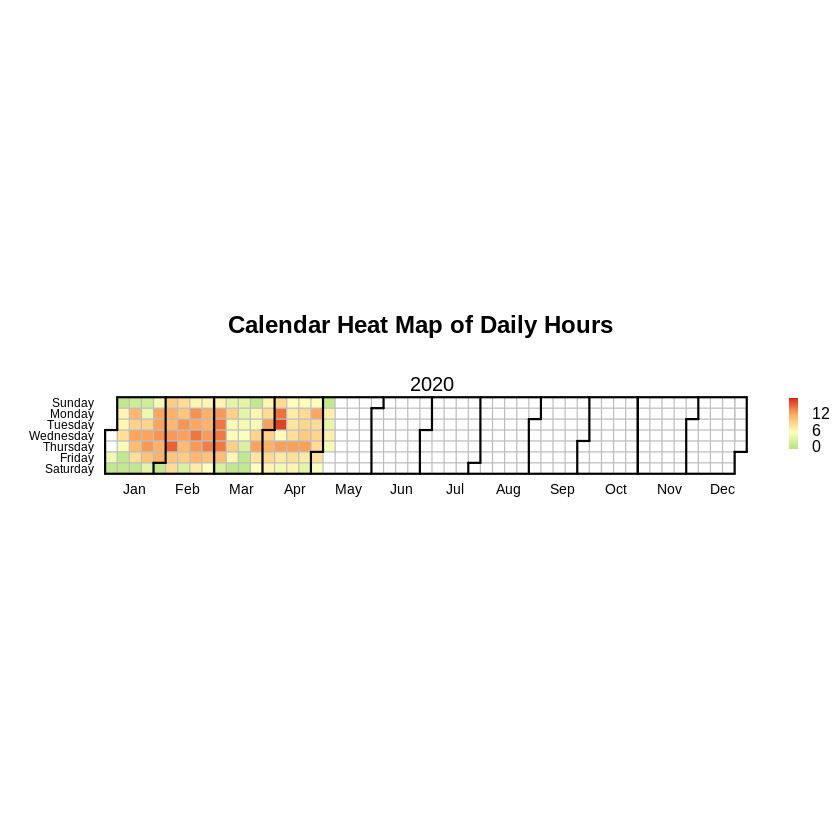

In [11]:
# install tidyquant 

#install.packages('tidyquant', repos = "http://cran.us.r-project.org")
#library(tidyquant)


library(tidyquant) 
source("https://raw.githubusercontent.com/iascchen/VisHealth/master/R/calendarHeat.R")


r2g <- c("#D61818", "#FFAE63", "#FFFFBD", "#B5E384") 
calendarHeat(data$date, data$total_hours, ncolors = 99, color = "g2r", varname="Daily Hours")
ggsave(file="calendarHeatMap.png", width=8, height=4, dpi=300)